In [1]:
import pandas as pd

In [7]:
dataset=pd.read_excel("C:\\Users\\nagan\\OneDrive\\Desktop\\couseml\\Linear Regression.xlsx")
dataset.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [8]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import preprocessing
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
normalized_df=(df-df.mean())/df.std()

NameError: name 'df' is not defined

In [11]:
dataset.shape

(21613, 5)

In [18]:
dataset.describe()

,price,sqft_living,bedrooms,bathrooms,floors
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,3.370842,2.114757,1.494309
std,3.671272e+05,918.440897,0.930062,0.770163,0.539989
min,7.500000e+04,290.000000,0.000000,0.000000,1.000000
25%,3.219500e+05,1427.000000,3.000000,1.750000,1.000000
50%,4.500000e+05,1910.000000,3.000000,2.250000,1.500000
75%,6.450000e+05,2550.000000,4.000000,2.500000,2.000000
max,7.700000e+06,13540.000000,33.000000,8.000000,3.500000


In [14]:
dataset.isnull().any()

price          False
sqft_living    False
bedrooms       False
bathrooms      False
floors         False
dtype: bool

In [16]:
X = dataset[['sqft_living','bedrooms','bathrooms','floors']]

In [17]:
y= dataset.price

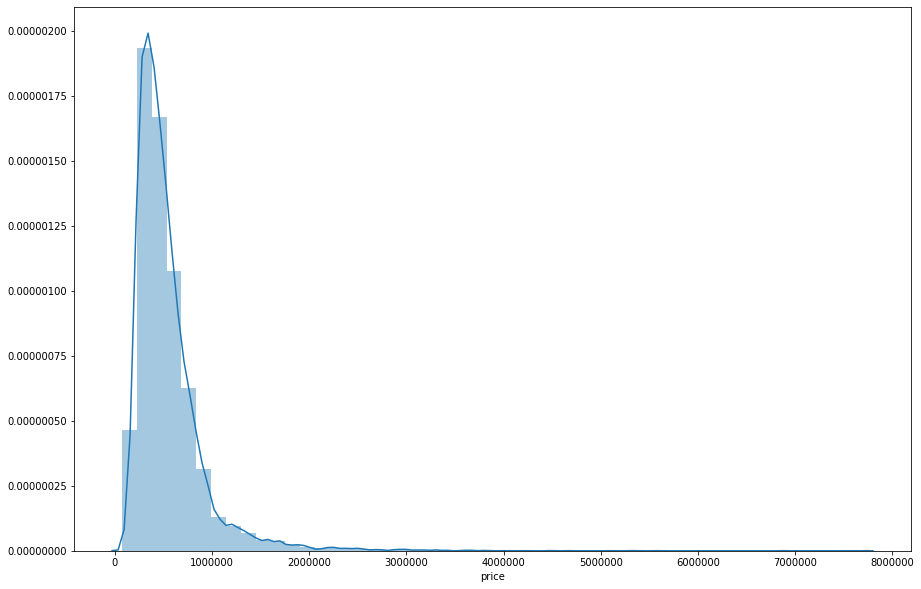

In [19]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['price'])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['coefficient'])  
coeff_df

,coefficient
sqft_living,310.855577
bedrooms,-54235.212195
bathrooms,1633.656805
floors,2182.860836


In [27]:
y_pred = regressor.predict(X_test)

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
17384,297000,4.158436e+05
722,1578000,1.315221e+06
2680,562100,4.133612e+05
18754,631500,3.174044e+05
14554,780000,8.508212e+05
16227,485000,4.294474e+05
6631,340000,4.494329e+05
19813,335606,7.054872e+05
3367,425000,6.270052e+05
21372,490000,1.198298e+06


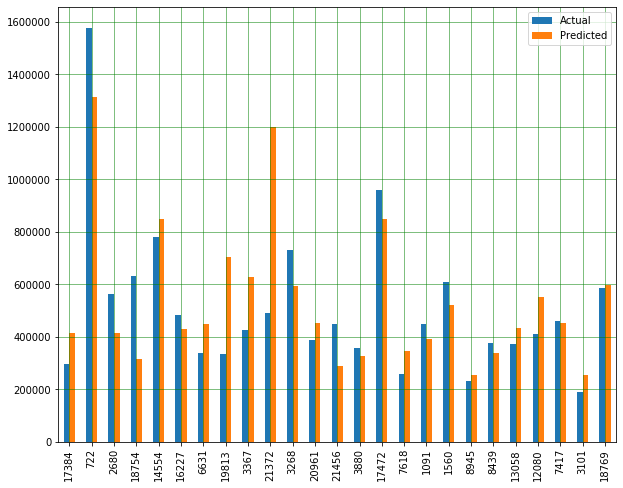

In [32]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 169669.0001695836
Mean Squared Error: 66379302151.73661
Root Mean Squared Error: 257641.80978974784


In [34]:

dataset.corr()

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


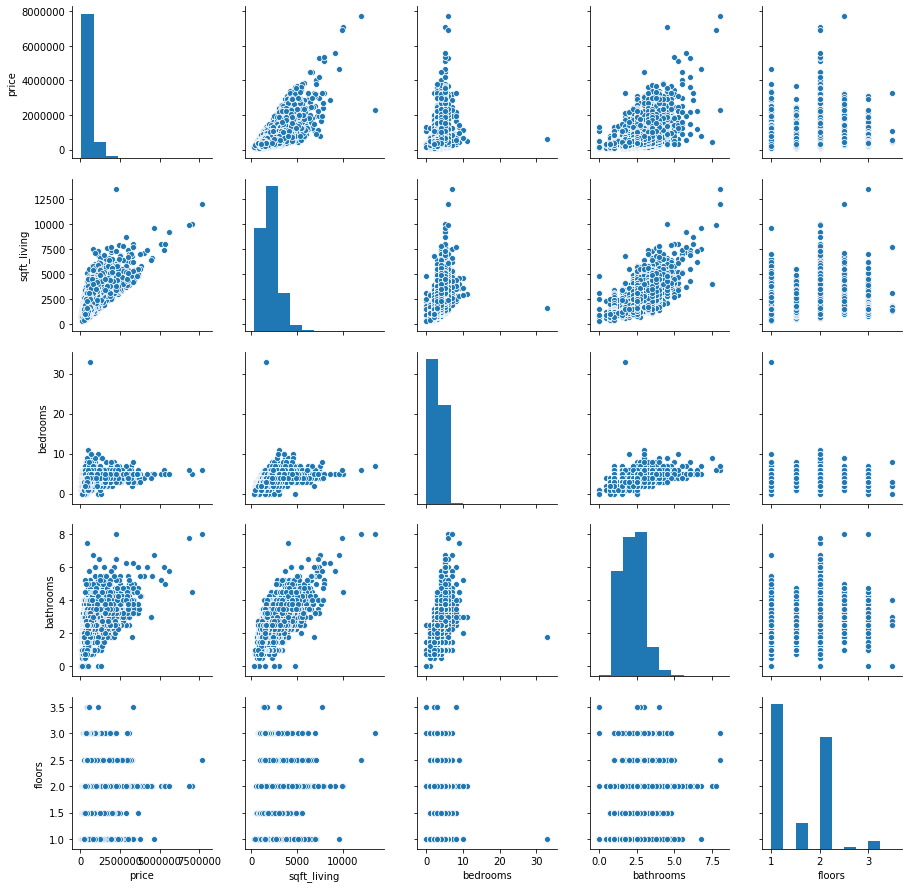

In [38]:
import seaborn as sns
sns.pairplot(dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F86FCC0388>,
      dtype=object)

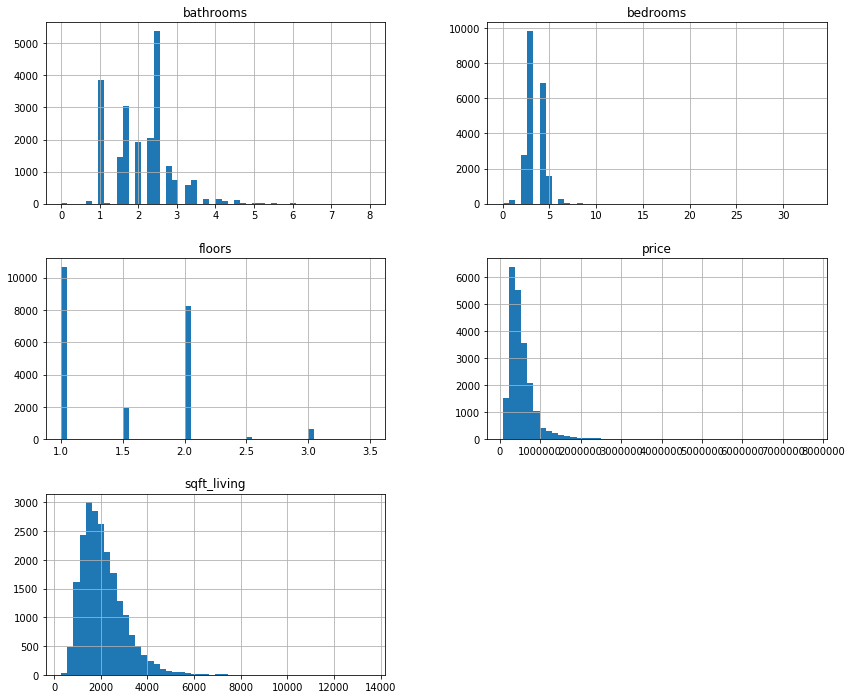

In [39]:
dataset.hist(figsize=(14,12), bins=50)

In [40]:
from sklearn.metrics import r2_score
print(f"R-Square score is {r2_score(y_test, y_pred)}")

R-Square score is 0.5003085644927433
